In [306]:
import psycopg2
import pandas as pd

In [307]:
conn = psycopg2.connect("dbname=gregorian user=codex")
conn.set_client_encoding('UTF8')
cursor = conn.cursor()

In [308]:
# query

'''cursor.execute("""
                SELECT gabc 
                FROM gregobase_chants 
                WHERE office_part LIKE \'in\'
                LIMIT 5;
               """)'''
cursor.execute("""
                SELECT gabc 
                FROM gregobase_chants 
                LIMIT 5;
               """)

In [322]:
# get first chant

txt = cursor.fetchone()

In [323]:
chant = eval(txt[0])

# FUNCTIONS

In [327]:
import re
        

def find_all_groups(chant):
    """
    find only neumes
    """
    # esclude anche le chiavi
    # pattern = re.compile('(\([^\(\):;,0-9]*\))')
    pattern = re.compile('(\([^\(\)]*\)\s*)')
    allneumes = re.findall(pattern, chant)
    #allneumes = [clean_neuma(neuma) for neuma in allneumes]
    return allneumes

def clean_neuma(neuma):
    # elimina le parentesi tonde e riduce tutto in minuscolo
    neuma = re.sub('[\(|\)]','', neuma).lower()
    # elimina i seguenti caratteri: ~<>owvVsr._'!
    neuma = re.sub('[~<>owvVsr._\'!\s/\\\\r\\\\n]','', neuma)
    return neuma

In [330]:
whole_chant = ''.join(find_all_groups(chant))
whole_chant

"(c4) (g)(gd) () (d)(e)(f)(gh)(h) (ghhg)(g.) (;) (g) (g)(hj)(jjj)(g) (high)(h.) (:) (gh)(j)(i)(jk) (k)(kj) (k)(g.) (hj)(j) (ijhhg.) (;) (g) (h)(gf)(gh)(h)(h!jj) (h_ghvG'F)(f.) (:) (f) (fg~)(g)(ghGF'h)(h) (h) (hih)(g.) (h)(j) (ikjj)(ji..) (;) (j) (jjk)(hg)(h) (gf)(gh)(h.) (,) (h)(h)(j.h!iw!jvIG'h)(g.) (egF'E)(e.) (::) (e)(f)(gh)(g.) (,) (gh)(g.h!iwjjvIH'G)(g_e/fgF'E)(e.) (::) (g)(hj)(j)(j)(j) (j)(j) (k)(j)(j) (ih)(jjj) (:) (ig~)(hj)(j)(j)(j) (j)(j) (jji)(hg)(h') (i)(gh..) (::) (g)(hj)(j) (j)(j) (::) (j) (jji) (hg) (h') (i) (gh..) (::)"

In [347]:
def periods(chant):
    periods = []
    pattern = re.compile('\(::\)')
    #chant = re.findall(pattern, chant)
    chant = re.split(pattern, chant)
    chant = [c.strip(None) for c in chant if c != '']
    return chant

In [348]:
period = periods(whole_chant)
period

["(c4) (g)(gd) () (d)(e)(f)(gh)(h) (ghhg)(g.) (;) (g) (g)(hj)(jjj)(g) (high)(h.) (:) (gh)(j)(i)(jk) (k)(kj) (k)(g.) (hj)(j) (ijhhg.) (;) (g) (h)(gf)(gh)(h)(h!jj) (h_ghvG'F)(f.) (:) (f) (fg~)(g)(ghGF'h)(h) (h) (hih)(g.) (h)(j) (ikjj)(ji..) (;) (j) (jjk)(hg)(h) (gf)(gh)(h.) (,) (h)(h)(j.h!iw!jvIG'h)(g.) (egF'E)(e.)",
 "(e)(f)(gh)(g.) (,) (gh)(g.h!iwjjvIH'G)(g_e/fgF'E)(e.)",
 "(g)(hj)(j)(j)(j) (j)(j) (k)(j)(j) (ih)(jjj) (:) (ig~)(hj)(j)(j)(j) (j)(j) (jji)(hg)(h') (i)(gh..)",
 '(g)(hj)(j) (j)(j)',
 "(j) (jji) (hg) (h') (i) (gh..)"]

In [339]:
period.index()

TypeError: index() takes at least 1 argument (0 given)

In [344]:
a = ['qwe','ddd','']

In [363]:
import networkx as nx

DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 4, 0.5), (3, 1, 0.75)])
list(DG.successors(1))

[4]

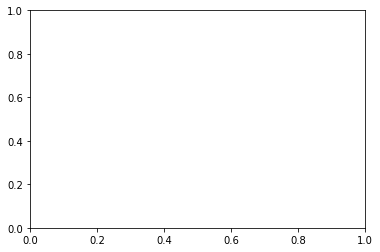

In [364]:
import matplotlib.pyplot as plt
nx.draw(DG, with_labels=True)
plt.subplot()

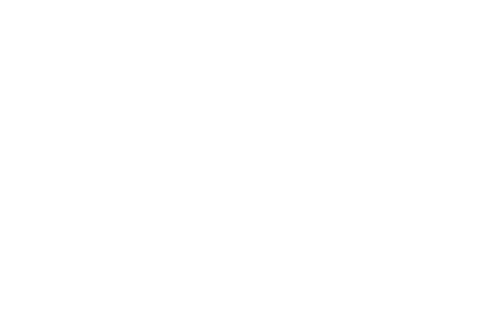

In [366]:
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

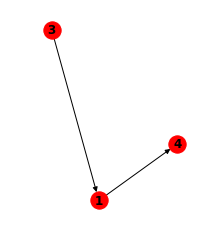

In [371]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(DG, with_labels=True, font_weight='bold')
#plt.subplot(122)